<a href="https://colab.research.google.com/github/DevVagabond/tensorflow-ml-templates/blob/main/Tensorflow_CNN_multiclass_classification_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
#download the dataset

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-24 12:56:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   215MB/s    in 2.3s    

2025-03-24 12:56:49 (215 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
#check data
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# set the dynamic class names in an array
import pathlib

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [4]:
#Fetch random images from directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image_path = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


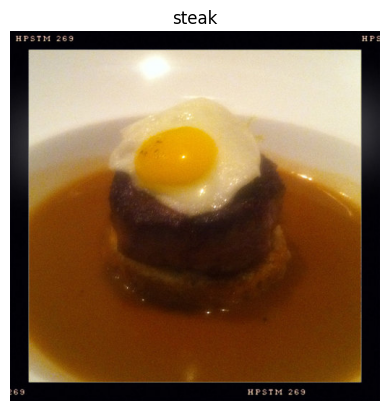

In [5]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class=random.choice(class_names))

In [6]:
#Image augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

image_gen_train = ImageDataGenerator(rescale=1/255.)
image_gen_test = ImageDataGenerator(rescale=1/255.)

train_path = "10_food_classes_all_data/train"
test_path = "10_food_classes_all_data/test"


In [7]:
image_train = image_gen_train.flow_from_directory(
    directory=train_path,
    batch_size=32,
    target_size=(224,224),
    seed=42,
    class_mode="categorical"
)

image_test = image_gen_test.flow_from_directory(
    directory=test_path,
    batch_size=32,
    target_size=(224,224),
    seed=42,
    class_mode="categorical"
)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
#build the model

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])


model_cnn.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_history = model_cnn.fit(image_train,epochs=10,steps_per_epoch=len(image_train),validation_data=image_test,validation_steps=len(image_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - accuracy: 0.3252 - loss: 1.9332 - val_accuracy: 0.3300 - val_loss: 1.9139
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - accuracy: 0.4503 - loss: 1.6507 - val_accuracy: 0.3464 - val_loss: 1.9718
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.6381 - loss: 1.1017 - val_accuracy: 0.3200 - val_loss: 2.2068
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.8524 - loss: 0.4823 - val_accuracy: 0.3048 - val_loss: 2.9823
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.9618 - loss: 0.1528 - val_accuracy: 0.2952 - val_loss: 4.4983
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - accuracy: 0.9876 - loss: 0.0615 - val_accuracy: 0.2744 - val_loss: 5.1858
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.9908 - loss: 0.0342 - val_accuracy: 0.2840 - val_loss: 5.7386
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - accuracy: 0.9941 - loss: 0

In [12]:
model_cnn.evaluate(image_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.2416 - loss: 7.0723


[6.910808563232422, 0.243599995970726]

In [13]:

#predict random image from  directory path
def predict_image(img_path):
  img = mpimg.imread(img_path)
  img = tf.constant(img)
  img = tf.image.resize(img,size=(224,224))
  img = img/255
  img = tf.expand_dims(img,axis=0)
  prediction = model_cnn.predict(img)
  pred_class = class_names[np.argmax(prediction)]
  return pred_class



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: pizza


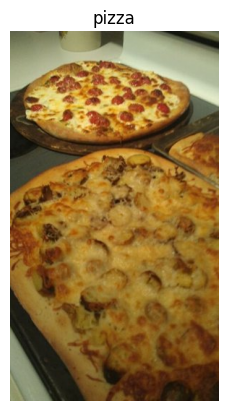

In [15]:
class_name = random.choice(class_names)
pred_path = "10_food_classes_all_data/train/"+class_name
random_number = random.randint(0,os.listdir(pred_path).__len__()-1)
pred = predict_image(pred_path+"/"+random.sample(os.listdir(pred_path),1)[0])
plt.imshow(mpimg.imread(pred_path+"/" + os.listdir(pred_path)[random_number]))
plt.title(class_name)
plt.axis("off")

print(f"Predicted class: {pred}")

In [16]:
def plot_loss_history(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()


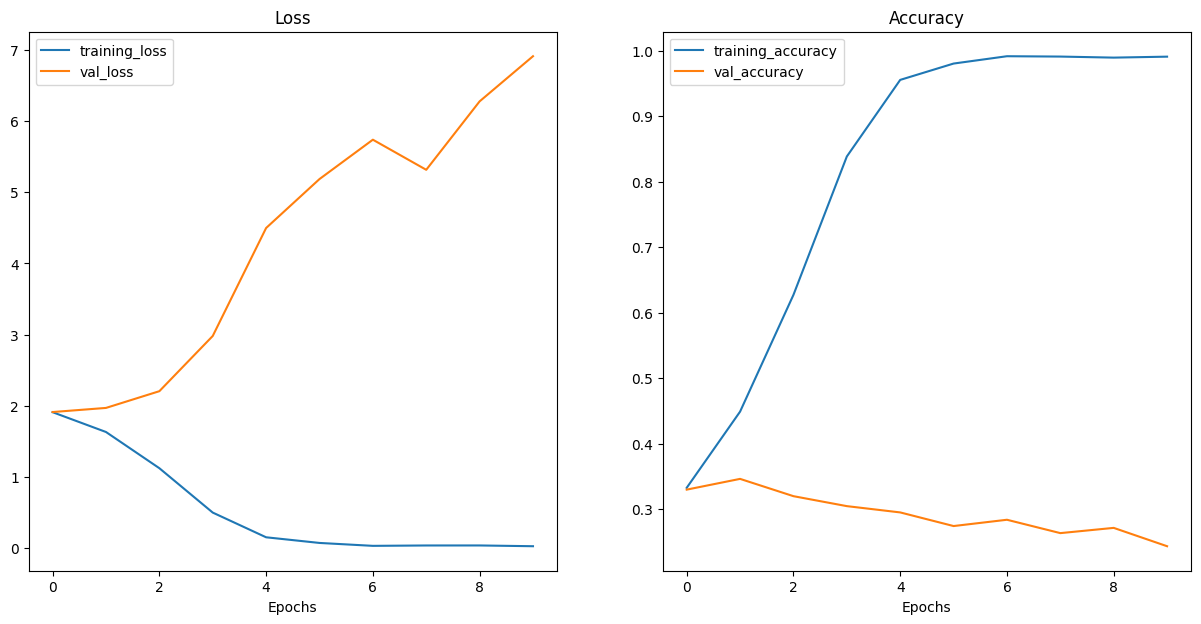

In [17]:
plot_loss_history(model_history)

# Reduce overfitting by image augmentation (flip, zoom, rotation)

In [21]:
train_gen_augmented = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True
                                         )


train_data_augmented = train_gen_augmented.flow_from_directory(train_path,
                                                              batch_size=32,
                                                              target_size=(224,224),
                                                               class_mode="categorical"
                                                                )




Found 7500 images belonging to 10 classes.


In [24]:
history_augmented = model_cnn.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=image_test,validation_steps=len(image_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 445ms/step - accuracy: 0.2843 - loss: 2.0412 - val_accuracy: 0.3312 - val_loss: 2.0487
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 454ms/step - accuracy: 0.3038 - loss: 1.9898 - val_accuracy: 0.3672 - val_loss: 1.8925
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 430ms/step - accuracy: 0.3335 - loss: 1.9508 - val_accuracy: 0.3528 - val_loss: 1.9719
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 426ms/step - accuracy: 0.3188 - loss: 1.9450 - val_accuracy: 0.3600 - val_loss: 1.9325
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 433ms/step - accuracy: 0.3406 - loss: 1.9031 - val_accuracy: 0.3700 - val_loss: 1.9453


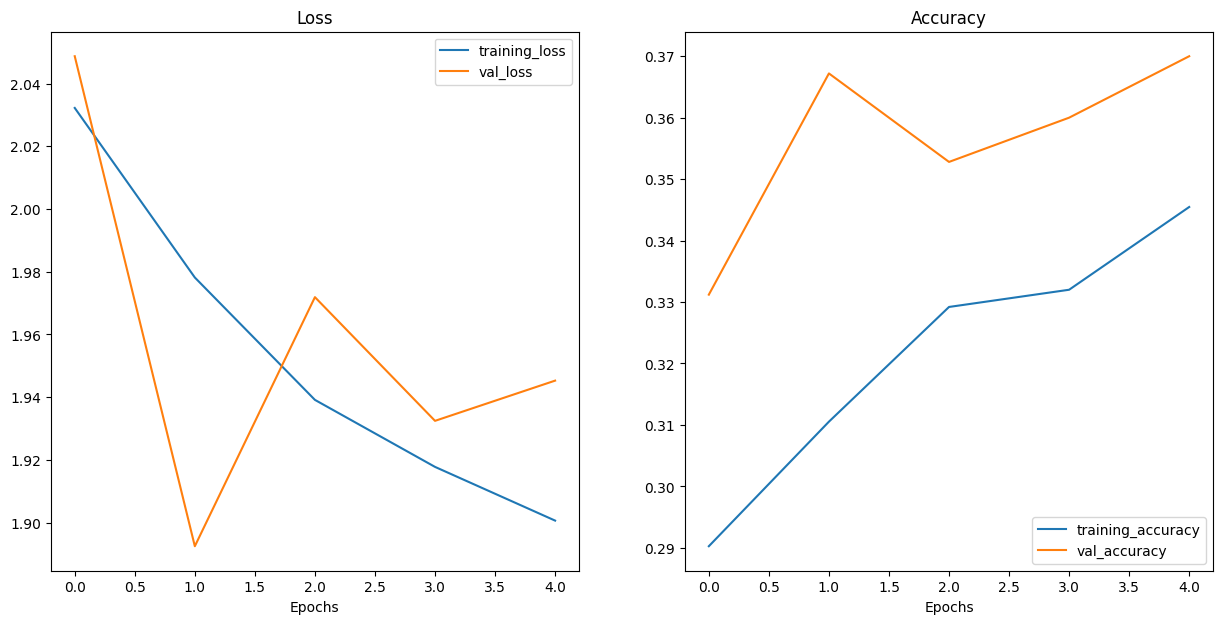

In [25]:
plot_loss_history(history_augmented)